# Python for Data Science

Machine Learning 4 - Regression, Time Series, Anomaly Detection

In [ ]:
!pip install -r requirements.txt

# Regression

- For continous target variables we can use regression models.

- Here we consider *linear regression*

## Least-Squares Linear Regression

*Linear*: Target variable $y\in R^n$ is modeled as linear combination $w \in R^d$ of features $X\in R^{n\times d}$:
    $$
        \hat{y} = X w
    $$
    
*Least-Squares*: Refers to the quadratic loss function 
    $$
    E(w) = (y - \hat{y})^2
    $$

## Derivation

Compute derivative w.r.t $w$:
$$
E(w)= (y - Xw)^2 = (y - Xw)^\top (y-Xw) = y^\top y - 2y^\top Xw + wX^\top X w
$$

$$
\frac{\partial E}{w} = -2y^\top X + 2 X^\top Xw
$$
We want the derivative $\frac{\partial E}{w}$ to be zero, hence
$$
w = (X^\top X)^{-1} X^\top y
$$

## Example: California Housing Data

Number of Instances: 20640

Attribute Information:
 	
- MedInc median income in block
- HouseAge median house age in block
- AveRooms average number of rooms
- AveBedrms average number of bedrooms
- Population block population
- AveOccup average house occupancy
- Latitude house block latitude
- Longitude house block longitude


Target: median house value for California districts

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# fetch the data  
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# train a linear regression model
model = LinearRegression().fit(X_train, y_train)

# use the model to predict house value on test set
y_predicted = model.predict(X_test)

print(f"mse: {mean_squared_error(y_test, y_predicted)}")

mse: 0.5244744438549814


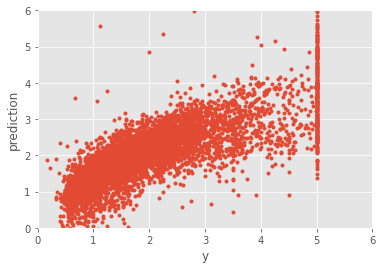

In [4]:
plt.plot(y_test, y_predicted, '.')
plt.xlim([0,6])
plt.ylim([0,6])
plt.xlabel("y")
plt.ylabel("prediction");

# Model Evaluation
    
- Machine Learning models are evaluated by comparing the predictions $f(x)=\hat{y}$ and the target values $y$

- As ML models can memorize any training data set, **all metrics must always be computed using cross-validation**

## Regression Metrics

- Mean Squared Error
- Mean Absolute Error 
- Coefficient of determination

## Regression Metrics: Mean Squared Error

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2 $$


In [5]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 80]
mean_squared_error(y_true, y_pred)

1332.375

## Regression Metrics: Mean Absolute Error 

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

In [6]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 80]
mean_absolute_error(y_true, y_pred)

18.5

## Regression Metrics: Coefficient of determination

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$

with 

$$\bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$$

In [7]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

# Time Series 

- How to represent time series data?

- Classical Models
    - Autoregressive Moving Average (ARMA) Models
    - ARMA Models with exogenous regressors

- Recent Software Packages
    - [Facebook Prophet](https://facebook.github.io/prophet/)
    - [Amazon Gluon TS](https://github.com/awslabs/gluon-ts)



## Resources

- [*the* time series book by Hyndman](https://otexts.com/fpp2/)
- [Jason Brownlee's blog on time series](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)
- [Machine Learning + blog entry](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- [Jake VanderPlas' Book Chapter](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)


## Data Structure for Time Series

- builtin python: ``datetime``
- Pandas

## Builtin python: ``datetime``

In [8]:
from datetime import datetime
date = datetime(year=2021, month=1, day=1)
date.strftime('%A')

'Friday'

### Pandas ``to_datetime``

In [9]:
import pandas as pd
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [10]:
cars = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv", header=0, index_col=0)
cars.index = pd.to_datetime(cars.index)

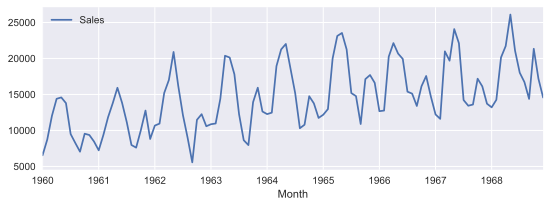

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [9, 3]
import seaborn; seaborn.set()
cars.plot();

## Modeling Time Series Data

* Time Series are difficult to model
 * Often periodicity is not known
 * Not clear which features are useful
 * Many model assumptions are not realistic for every data set
 

## Cross-Validation for Time Series

* Depending on temporal structure, samples are not independent
* Random partitions violate independence assumption of data
* Cross-Validation for time series should:
 * Use block partitions
 * More common: test/validation chosen from the end of the training data. 

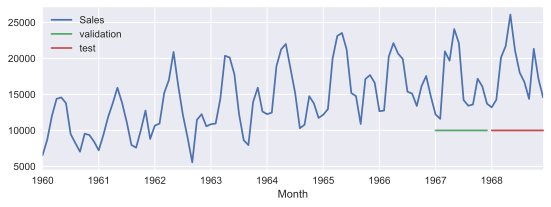

In [12]:
ax = cars.plot()
pd.Series(index=pd.to_datetime(['1967-01-01','1967-12-31']),
          data=[10000,10000],name='validation').plot(ax=ax)
pd.Series(index=pd.to_datetime(['1968-01-01','1968-12-31']),
          data=[10000,10000],name='test').plot(ax=ax)
plt.legend();

## Popular Time Series Models

 * Moving Average (Smoothing)
 * Autoregressive (AR) Models (= Linear regression)
 * ARMA (AR and MA combined)
 * ARIMA (I stands for temporal differencing to make time series more stationary)
 * SARIMA (with seasonality)
 * SARIMAX (X stands for exogenous features)
 * Neural Networks (Feedforward, LSTMs, ...)
 * Any non-linear regression with seasonality features (weekday, month, year one-hot-encoded)

## Rolling Mean (Moving Average Model)

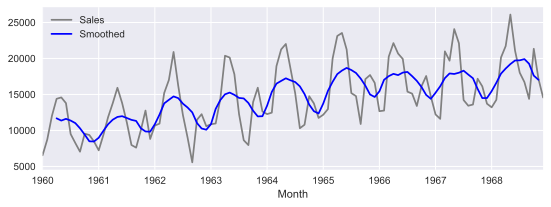

In [13]:
ax = cars.plot(color='grey')
cars.Sales.rolling(6, center=True, closed='both').mean().plot(ax=ax, color='blue')
plt.legend(['Sales','Smoothed']);

## Seasonal Decompositions using Moving Averages

$X_t = \text{trend}_t + \text{seasonality}_t + \varepsilon_t$

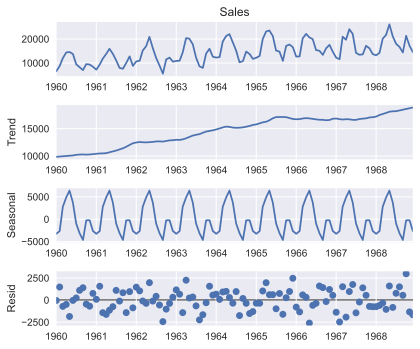

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
decomposition = seasonal_decompose(cars['Sales'], model='additive', extrapolate_trend='freq')
plt.rcParams['figure.figsize'] = [6, 5]
decomposition.plot();

## Autoregressive Model and Extensions
$X_{t}=c+\sum _{i=1}^{p}\varphi _{i}X_{t-i}+\varepsilon _{t}$

where $\varphi _{1},\ldots ,\varphi _{p}$ are parameters, $c$ is a constant, and the random variable $\varepsilon _{t}$ is white noise.

$\varphi$ is estimated using *Linear Regression*.

See also [Wikipedia on ARMA models](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)

AR Models can be extended to SARIMAX to include 

* Moving Average components (MA)
* Integration (I)
* Seasonality (S)
* Exogenous features (X)

For finding optimal parameters, use grid search ([great example by Jason Brownlee](https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/))

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
cars.index = pd.DatetimeIndex(cars.index.values,
                               freq=cars.index.inferred_freq)
model = SARIMAX(cars, order=(1, 1, 1), seasonal_order=(2, 2, 2, 12), trend='ct')
model_fit = model.fit(disp=0, maxiter=100)
yhat = model_fit.get_forecast(12)
forecast = yhat.conf_int().join(yhat.predicted_mean.rename('Mean'))

/Users/felix/anaconda3/envs/pdds-2021/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:>

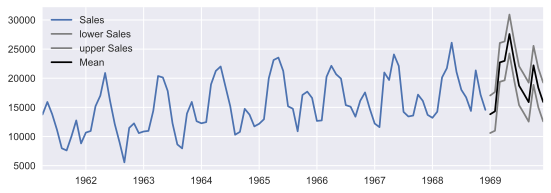

In [16]:
plt.rcParams['figure.figsize'] = [9, 3]
ax = cars[15:].plot()
forecast.plot(ax=ax,color=['grey','grey','black'])

# Anomaly Detection

* Anomaly detection is an important task
* Anomaly detection is **difficult**:
 * We usually don't know what is normal/anomalous
 * If we have examples of anomalies, they are usually *very rare*
* For evaluation, we can use *classification metrics* but we need labels for that

There are great libraries for anomaly detection:
* [scikit-learn anomaly detection demo](https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py)
* [pyOD](https://github.com/yzhao062/pyod#quick-start-for-outlier-detection)

## Simple Univariate Example

Consider univariate data $x\in R^1$ drawn from a normal distribution $\mathcal{N}(\mu,\sigma^2)$.

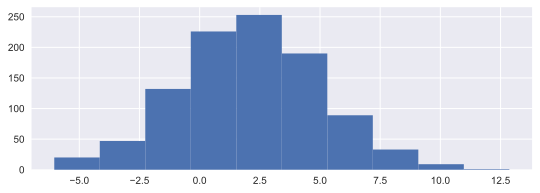

In [17]:
import numpy as np
mu = 2
sigma = 3
x = np.random.randn(1000) * sigma + mu

plt.hist(x);

### What's an anomalous data point?

The likelihood of each sample under this distribution is given by 

$p(x) = {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

So you can compute the likelihood of any given data point as:

In [18]:
def gauss_likelihood(x, mu, sigma):
    '''
    Computes the likelihood of x assuming x is from a 
    normal distribution with mean mu and standard deviation sigma
    '''
    denom = (np.sqrt(2.*np.pi)*sigma)
    num = np.exp(-.5*((x - mu) / sigma)**2)
    return num/denom

print(gauss_likelihood(2., mu,sigma))

# alternatively you can use the scipy.stats package
from scipy.stats import norm
my_gauss = norm(mu, sigma)
print(my_gauss.pdf(2))

0.1329807601338109
0.1329807601338109


### Defining Anomaly

Given a data point and a (not necessarily generative) model of your data, you can define a threshold for *what's an anomaly*. 

For instance, a common threshold is to assume that data points for which $p(x)< 0.05$ or $p(x)< 0.01$ are anomalous.  

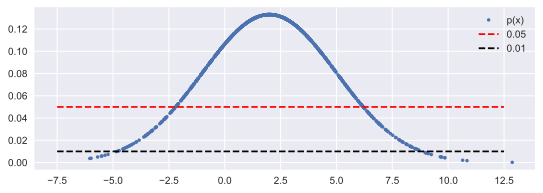

In [19]:
steps = np.arange(-10,100)
plt.plot(x, gauss_likelihood(x,mu,sigma),'.');
plt.plot([-7.5,12.5],[.05,.05],'r--')
plt.plot([-7.5,12.5],[.01,.01],'k--')
plt.legend(['p(x)','0.05','0.01'])

## Anomaly Detection: Two Examples

* Simple Parametric Approach: Assuming Gaussian Data
* Sophisticated Non-parametric: Isolation Forest

Example taken from [Alexandre Gramforts sklearn tutorial](https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py)

In [20]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['figure.figsize'] = [5, 5]

n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plot_num = 1
rng = np.random.RandomState(42)


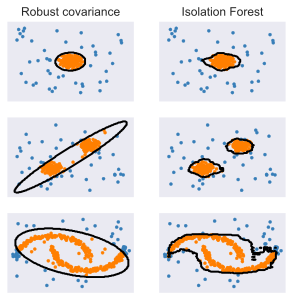

In [21]:
for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
    for name, algorithm in anomaly_algorithms:
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=12)
        y_pred = algorithm.fit(X).predict(X)
        # plot the levels lines and the points
        Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        plt.xlim(-7, 7);plt.ylim(-7, 7);plt.xticks(());plt.yticks(());
        plot_num += 1
        
plt.show()